In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Load_data
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0 #normalization

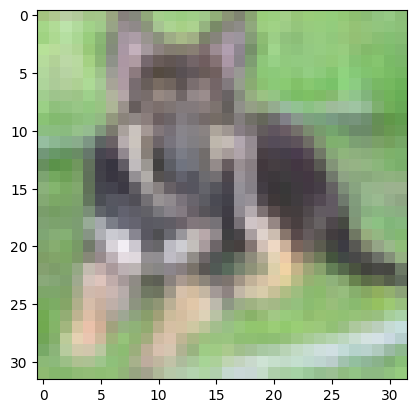

In [ ]:
#Display_Image
import matplotlib.pyplot as plt
plt.imshow(x_train[156])
plt.show()

In [ ]:
y_train[156]

array([5], dtype=uint8)

In [ ]:
model=keras.Sequential([layers.Flatten(input_shape=(32,32,3)),
                        layers.Dense(256,activation='relu'),
                        layers.Dense(128,activation='relu'),
                        layers.Dense(64,activation='relu'),
                        layers.Dense(10,activation='softmax')])

In [ ]:
model.compile(optimizer='adam',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
n=model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1407/1407 [==============================] - 19s 13ms/step - loss: 1.8858 - accuracy: 0.3153 - val_loss: 1.7429 - val_accuracy: 0.3742
Epoch 2/10
1407/1407 [==============================] - 17s 12ms/step - loss: 1.6916 - accuracy: 0.3933 - val_loss: 1.7191 - val_accuracy: 0.3878
Epoch 3/10
1407/1407 [==============================] - 19s 13ms/step - loss: 1.6142 - accuracy: 0.4204 - val_loss: 1.6126 - val_accuracy: 0.4160
Epoch 4/10
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5606 - accuracy: 0.4398 - val_loss: 1.5629 - val_accuracy: 0.4408
Epoch 5/10
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5269 - accuracy: 0.4508 - val_loss: 1.5301 - val_accuracy: 0.4556
Epoch 6/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.4983 - accuracy: 0.4639 - val_loss: 1.5422 - val_accuracy: 0.4496
Epoch 7/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.4734 - accuracy: 0.4703 - val_loss: 1.5275 -

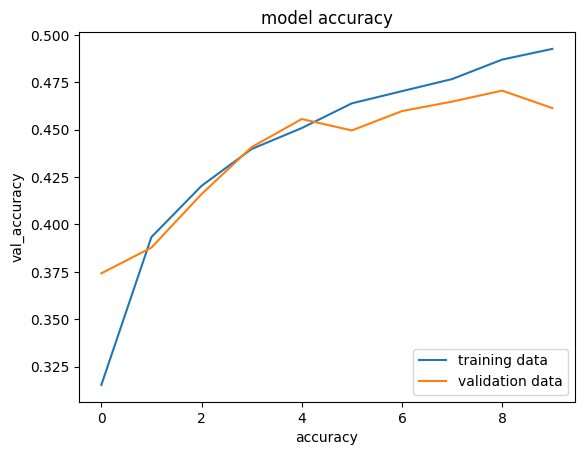

In [ ]:
#model_accuracy
import matplotlib.pyplot as plt
plt.plot(n.history['accuracy'])
plt.plot(n.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.legend(['training data','validation data'],loc='lower right')
plt.show()

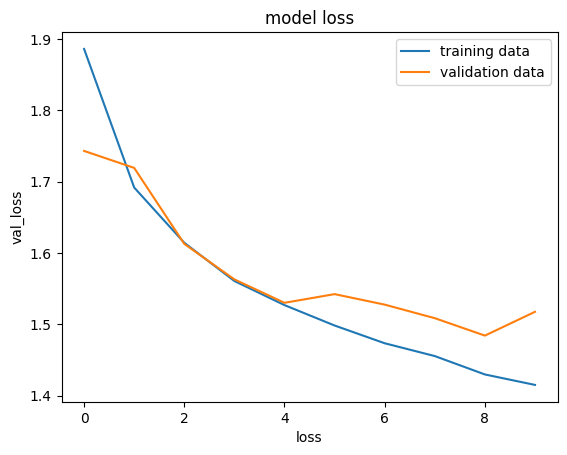

In [ ]:
##model_loss
plt.plot(n.history['loss'])
plt.plot(n.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend(['training data','validation data'],loc='upper right')
plt.show()

In [ ]:
y_pred=model.predict(x_test)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[1.08071612e-02, 4.50617969e-02, 6.69548213e-02, ...,
        2.90160123e-02, 1.77201424e-02, 2.55479217e-02],
       [2.47493181e-02, 4.09269154e-01, 4.52459231e-03, ...,
        7.13626912e-04, 1.40276492e-01, 4.17433232e-01],
       [1.64789364e-01, 2.42002964e-01, 1.15559679e-02, ...,
        1.89473443e-02, 1.15857668e-01, 4.31379080e-01],
       ...,
       [3.68988072e-03, 3.04493267e-04, 1.97326109e-01, ...,
        1.87703203e-02, 8.49205069e-03, 2.07179668e-03],
       [1.35132745e-02, 1.30947763e-02, 2.11544231e-01, ...,
        4.20516208e-02, 1.15150483e-02, 6.48129638e-03],
       [2.87682116e-02, 2.47128401e-03, 2.86232114e-01, ...,
        3.47372770e-01, 2.16460158e-03, 4.21339041e-03]], dtype=float32)

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([3, 9, 9, ..., 3, 5, 7])

In [ ]:
from sklearn.metrics import accuracy_score
#accuracy_score
accuracy_score(y_test,y_pred)

0.4663